**BANK CUSTOMER CHURN ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Data Cleaning

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


categorical to nuerical

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df=pd.get_dummies(df,columns=['Geography'], drop_first=True)

In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
features=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender','Geography_Spain']
x=df[features]
y=df['Exited']

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Feature scaling

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[:5], x_test[:5]

(array([[ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
          0.64920267,  0.97481699,  1.36766974,  0.91324755, -0.57638802],
        [-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
          0.64920267,  0.97481699,  1.6612541 ,  0.91324755, -0.57638802],
        [-0.96147213, -1.41636539, -0.69539349,  0.61862909, -0.91668767,
          0.64920267, -1.02583358, -0.25280688,  0.91324755,  1.73494238],
        [-0.94071667, -1.13114808,  1.38675281,  0.95321202, -0.91668767,
          0.64920267, -1.02583358,  0.91539272, -1.09499335, -0.57638802],
        [-1.39733684,  1.62595257,  1.38675281,  1.05744869, -0.91668767,
         -1.54035103, -1.02583358, -1.05960019,  0.91324755, -0.57638802]]),
 array([[-0.57749609, -0.6557859 , -0.69539349,  0.32993735,  0.80843615,
         -1.54035103, -1.02583358, -1.01960511,  0.91324755, -0.57638802],
        [-0.29729735,  0.3900109 , -1.38944225, -1.21847056,  0.80843615,
          0.64920267,  0.97481

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred =model.predict(x_test)

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print("Confusion Matrix:",conf_matrix)
print("Class report:",class_report)
print("Accuracy:",accuracy)

Confusion Matrix: [[1549   58]
 [ 221  172]]
Class report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.8605


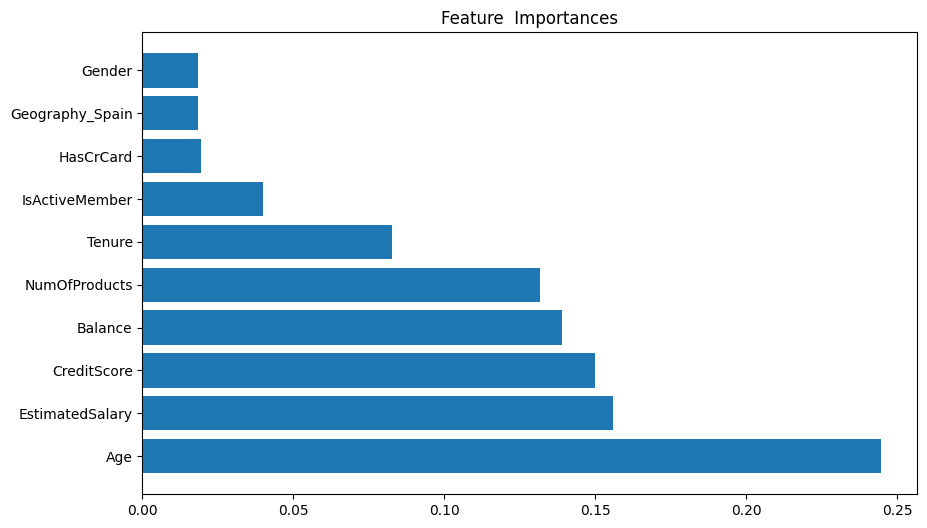

In [ ]:
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]
names=[features[i]for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature  Importances")
plt.barh(range(x.shape[1]),importances[indices])
plt.yticks(range(x.shape[1]),names)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=42)
log_reg.fit(x_train,y_train)

y_pred_log_reg=log_reg.predict(x_test)

conf_matrix_log_reg=confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
accuracy_log_reg=accuracy_score(y_test,y_pred_log_reg)
print("Confusion Matrix:",conf_matrix_log_reg)
print("Class report:",class_report_log_reg)
print("Accuracy:",accuracy_log_reg)

Confusion Matrix: [[1557   50]
 [ 330   63]]
Class report:               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.56      0.16      0.25       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.77      0.81      0.77      2000

Accuracy: 0.81


In [ ]:
from sklearn.svm import SVC
svm_model =SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(conf_matrix_svm)
print(class_report_svm)
print(accuracy_svm)

[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

0.8035


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(conf_matrix_knn)
print(accuracy_knn)
print(class_report)

[[1520   87]
 [ 245  148]]
0.834
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(x_train, y_train)

y_pred_gbm = gbm_model.predict(x_test)

conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(conf_matrix_gbm)
print(class_report_gbm)
print(accuracy_gbm)

[[1551   56]
 [ 215  178]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000

0.8645
